In [1]:
%matplotlib inline
import yt
import numpy as np
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt
from galaxy_analysis.analysis import Galaxy
import deepdish as dd
from scipy import integrate
from galaxy_analysis.particle_analysis.IMF import compute_IMF, IMF

/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:
#
# Load all of the simulation data, both latest output and galaxy analysis output files
# in order to look at SFR and radiation properties of the stars
#
#

ds = {}
data = {}
hist, bins, cent = {}, {}, {}

wdir = "/home/aemerick/work/enzo_runs/"

dsname = {'Fiducial' : wdir + 'sn_H2atten_H2sh/DD0619/DD0619',
           'Shortrad' : wdir + 'sn_H2atten_H2_shortrad/DD0613/DD0613',
           'NoRT'     : wdir + 'sn_H2atten_H2_noion/DD0229/DD0229'}

wdirs  = {'Fiducial' : wdir + 'sn_H2atten_H2sh/',
           'Shortrad' : wdir + 'sn_H2atten_H2_shortrad/',
           'NoRT'     : wdir + 'sn_H2atten_H2_noion/'}

_ds =     {'Fiducial'     : 'DD0619',
           'Shortrad' : 'DD0613',
           'NoRT'     : 'DD0229'}
dd_data = {}
sfr_t = {}
sfr = {}
sfr_fit = {}
gal = {}
for k in ['Fiducial','Shortrad','NoRT']:
    ds[k] = yt.load(dsname[k])
    data[k] = ds[k].all_data()
    gal[k] = Galaxy(_ds[k], wdir = wdirs[k])
    dd_data[k] = dd.io.load(wdirs[k] + _ds[k] + '_galaxy_data.h5')
    
    sfr_t[k] = dd_data[k]['time_data']['time'] / 1.0E6
    sfr[k]   = dd_data[k]['time_data']['SFR'] 

    # make a dictionary of SFR fit functions
    sfr_fit[k] = lambda x : np.interp(x, sfr_t[k] - np.min(sfr_t[k]), sfr[k])

Parsing Hierarchy : 100%|██████████| 1227/1227 [00:00<00:00, 49231.93it/s]
/home/aemerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
6 ionization state fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 422/422 [00:00<00:00, 45008.30it/s]
/home/aemerick/code/onezone/data_tables.py:90: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:
Parsing Hierarchy : 100%|██████████| 2607/2607 [00:00<00:00, 40753.57it/s]


In [ ]:
#outfile = open("fiducial_SFR.dat","w")
#outfile.write("# t SFR\n")
#for i in np.arange(np.size(sfr_t['Fiducial'])):
#    outfile.write("%5.5E %5.5E\n"%(  sfr_t['Fiducial'][i] - np.min(sfr_t['Fiducial']), sfr['Fiducial'][i]))
#outfile.close()

In [3]:
import glob, pickle

def IMF_stats(fpath):
    """
    This has a bit of hardcoded grosness. Goes through a file path and loads data dump #1
    for all onez models there [this takes a while becuase I need to rewrite IO for onezone].
    Limits number of files so this doesn't take super long, but still might be a few minutes to do
    (going through pickles... not ideal)....
    
    Assumes final dump of run is dump 0001
    
    Returns disctionary with statistics on the IMF properties from the runs (normalized)
    """
    files = np.sort(glob.glob( fpath + 'run????_dump_0001'))[:50]
    
    IMF_array = np.zeros( (np.size(files), 24) )
    
    for i in np.arange(np.size(files)):
        f     = open(files[i],'r')
        ztemp = pickle.load(f)
        #f.close()
        
        masses = ztemp.all_stars.M_o()
        IMF_array[i], bins, bincent  = IMF(masses, m_min = 1.0, m_max = 100.0)
        IMF_array[i] = IMF_array[i] / (1.0 * IMF_array[i][0])
        
        f.close()
        del(ztemp)
        
    stats = {}
    stats['median'] = np.median(IMF_array,axis=0)
    stats['min']    = np.min(IMF_array,axis=0)
    stats['max']    = np.max(IMF_array,axis=0)
    stats['q1']     = np.percentile(IMF_array, 25, axis=0)
    stats['q3']     = np.percentile(IMF_array, 75, axis=0)
    
    return stats

# average the IMFs together from the onezone output
onez_IMF_stats = IMF_stats("/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/")


In [4]:
#
# Compute the IMF For the simulation data
#
t_init = 119.0
for k in ds.keys():
    hist[k], bins[k], cent[k] = compute_IMF(ds[k], data[k], mode = "birth_mass",
                                            tmin = t_init, tmax = t_init + 150.0)
np.size(hist['Fiducial'])

Parsing Hierarchy : 100%|██████████| 3233/3233 [00:00<00:00, 47923.98it/s]


24

In [5]:

def compute_ionizing_flux(data, t):
    """
    Compute the total HI and HeI ionizing flux at a given time for 
    a dataset. Selects only stars that are alive at time "t".
    Also returns the total stellar mass formed up to that point
    """
    M     = data['birth_mass'].value
    to    = data['creation_time'].to('Myr')
    
    
    L0  = data[('io','particle_model_L0')]
    L1  = data[('io','particle_model_L1')]
    lifetime = data[('io','particle_model_lifetime')].to('Myr')
    
    
    age = t - to
    
    select_t =  (to <= t) * (age < lifetime)
    select = (M > 8.0) * select_t #* (to > tmin) * (to <= tmax)
    
    return np.sum(L0[select]), np.sum(L1[select]), np.sum(M[(to <= t)])
    

t_init = 119.0    

tcent = np.arange(0.0, 500.2, 1.)    
#tcent = 0.5 * (tbins[1:] + tbins[:-1])

L0 = {}
L1 = {}
M  = {}
L0_int = {}

# Integrate the luminosities to get the total radiation energy
for k in gal.keys():
    L0[k] = np.zeros(np.size(tcent))
    L1[k] = np.zeros(np.size(tcent))
    M[k]  = np.zeros(np.size(tcent))
    L0_int[k] = np.zeros(np.size(tcent)-1)
    
    for i in np.arange(np.size(tcent)):
        L0[k][i], L1[k][i], M[k][i] = compute_ionizing_flux(data[k], (tcent[i]  + t_init)* yt.units.Myr)
                                                            #tmin = tbins[i] + t_init,
                                                            #tmax = tbins[i+1] + t_init)
        #if i > 0 and i < np.size(tcent) - 1:
        #    L0_int[k][i] = np.trapz( [L0[k][i-1],L0[k][i]], [tcent[i-1],tcent[i]]) + L0_int[k][i-1]
        
    L0_int[k] = integrate.cumtrapz( L0[k], x = (tcent * yt.units.Myr).to('s').value)

In [30]:
from onezone.plots import plot_average_field as pf
reload(pf)

L_stats = pf.compute_property('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/',
                         'L_Q0', integrate = True, normalize = 3.1556E13)
L_dot_stats = pf.compute_property('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/',
                         'L_Q0', integrate = False, normalize = 3.1556E13)
L_M_stats= pf.compute_property('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/',
                         'L_Q0', integrate = True, normalize = 'M_o')
L_M_dot_stats= pf.compute_property('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/',
                         'L_Q0', integrate = False, normalize = 'M_o')

onez_M_stats = pf.compute_property('/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/onezone/onez_model/newrun2/',
                         'M_star_o', integrate = False)



for k in L_M_stats:
    if k == 't':
        continue
    L_M_stats[k] *= 3.115E13

In [32]:
L_M_dot_stats['median'] / 3.9E33

array([2.26307065e+02, 2.59541949e+02, 2.65733252e+02, 3.08246858e+02,
       2.77880796e+02, 2.36290675e+02, 1.90525471e+02, 1.60239369e+02,
       1.73078594e+02, 1.99944797e+02, 2.57663751e+02, 2.29078491e+02,
       2.55369565e+02, 2.45133152e+02, 2.50813791e+02, 2.54713793e+02,
       2.42107768e+02, 2.29683133e+02, 2.39951243e+02, 2.34208849e+02,
       2.31120164e+02, 2.36785866e+02, 2.28261025e+02, 2.27917281e+02,
       2.08157840e+02, 2.01508976e+02, 1.91750207e+02, 1.89173155e+02,
       1.85024601e+02, 1.96453470e+02, 1.98265360e+02, 1.88928326e+02,
       1.85269351e+02, 1.81435983e+02, 1.72858327e+02, 1.65722239e+02,
       1.57145700e+02, 1.56026106e+02, 1.49381386e+02, 1.40002491e+02,
       1.31392171e+02, 1.24965643e+02, 1.16315935e+02, 1.15905035e+02,
       1.06172019e+02, 9.23984548e+01, 7.67554707e+01, 7.53639463e+01,
       6.56954178e+01, 5.47724520e+01, 5.67724140e+01, 5.51980306e+01,
       5.03933836e+01, 4.39594700e+01, 3.83052723e+01, 3.74198443e+01,
      

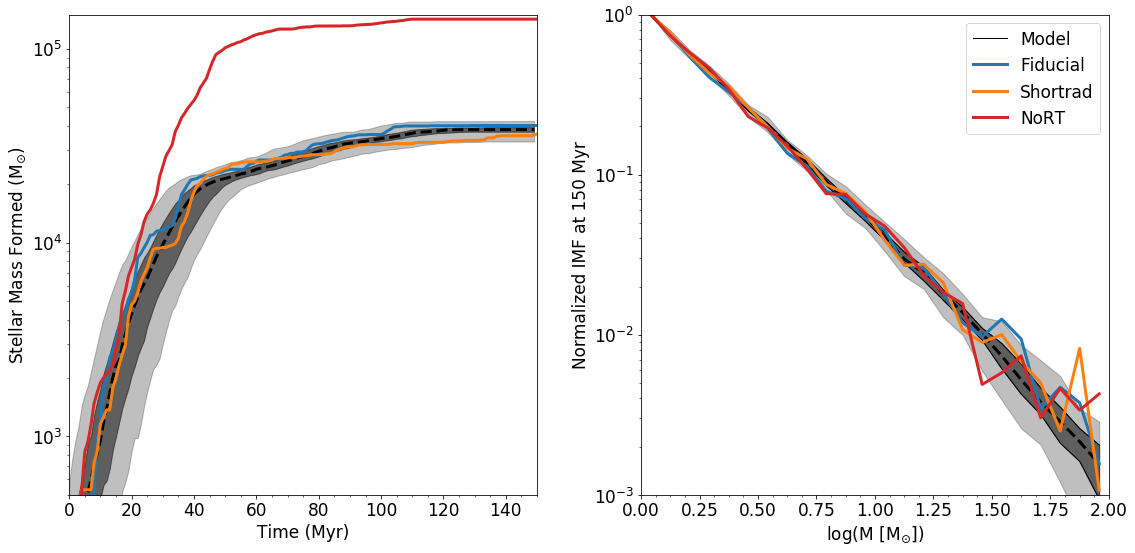

In [21]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)


x = 0.5*(bins['Fiducial'][1:] + bins['Fiducial'][:-1])
norm = onez_IMF_stats['median'][0]
miny = 1.0*onez_IMF_stats['min']
miny[miny==0.0] = 1.0E-3
ax[1].fill_between(x, onez_IMF_stats['q1']/norm, onez_IMF_stats['q3']/norm, color = 'black', alpha = 0.5)
ax[1].fill_between(x, miny/norm, onez_IMF_stats['max']/norm, color = 'black', alpha = 0.25)
ax[1].plot(x, onez_IMF_stats['median']/norm, color = 'black', lw = 3, ls = '--')
ax[1].plot(x, onez_IMF_stats['q1']/norm, color = 'black', lw = 1, ls = '-', label = "Model")
ax[1].plot(x, onez_IMF_stats['q3']/norm, color = 'black', lw = 1, ls = '-')

if False:
    plot_histogram(ax[1], bins['Fiducial'], hist['Fiducial'] / (1.0*hist['Fiducial'][0]), lw = 3, ls = '-', color = 'C0', label = 'Fiducial')
    plot_histogram(ax[1], bins['Shortrad'], hist['Shortrad']/ (1.0*hist['Shortrad'][0]), lw = 3, ls = '-', color = 'C1', label = 'Shortrad')
    plot_histogram(ax[1], bins['NoRT'], hist['NoRT']/ (1.0*hist['NoRT'][0]), lw = 3, ls = '-', color = 'C3', label = 'NoRT')

if True:
    ax[1].plot(x, hist['Fiducial'] / (1.0*hist['Fiducial'][0]), lw = 3, ls = '-', color = 'C0', label = 'Fiducial')
    ax[1].plot(x, hist['Shortrad']/ (1.0*hist['Shortrad'][0]), lw = 3, ls = '-', color = 'C1', label = 'Shortrad')
    ax[1].plot(x, hist['NoRT']/ (1.0*hist['NoRT'][0]), lw = 3, ls = '-', color = 'C3', label = 'NoRT')



ax[0].fill_between(onez_M_stats['t'],onez_M_stats['min'],onez_M_stats['max'],color='black',alpha=0.25)
ax[0].fill_between(onez_M_stats['t'],onez_M_stats['q1'],onez_M_stats['q3'],color='black',alpha=0.5)
ax[0].plot(onez_M_stats['t'],onez_M_stats['median'],color='black',lw = 3, ls = '--')
ax[0].plot(tcent, M['Fiducial'],lw = 3, color = 'C0')
ax[0].plot(tcent, M['Shortrad'],lw = 3, color = 'C1')
ax[0].plot(tcent, M['NoRT'], lw = 3, color = 'C3')
ax[0].set_xlim(0,150.)
ax[0].set_ylim(5.0E2, 1.5E5)
ax[0].semilogy()
ax[0].set_xlabel(r'Time (Myr)')
ax[0].set_ylabel(r'Stellar Mass Formed (M$_{\odot}$)')
ax[0].minorticks_on()
ax[1].semilogy()
ax[1].set_ylim(1.0E-3,1.0)
ax[1].set_xlim(0.0, 2.0)
ax[1].set_xlabel(r'log(M [M$_{\odot}$])')
#ax.set_ylabel(r'dN/log(M)')
ax[1].set_ylabel(r'Normalized IMF at 150 Myr')
ax[1].legend(loc='best')
ax[1].minorticks_on()
plt.tight_layout()

fig.savefig("/home/aemerick/code/galaxy_analysis/papers/radiation_paper/IMF_comparison.png")

2.111347898966959


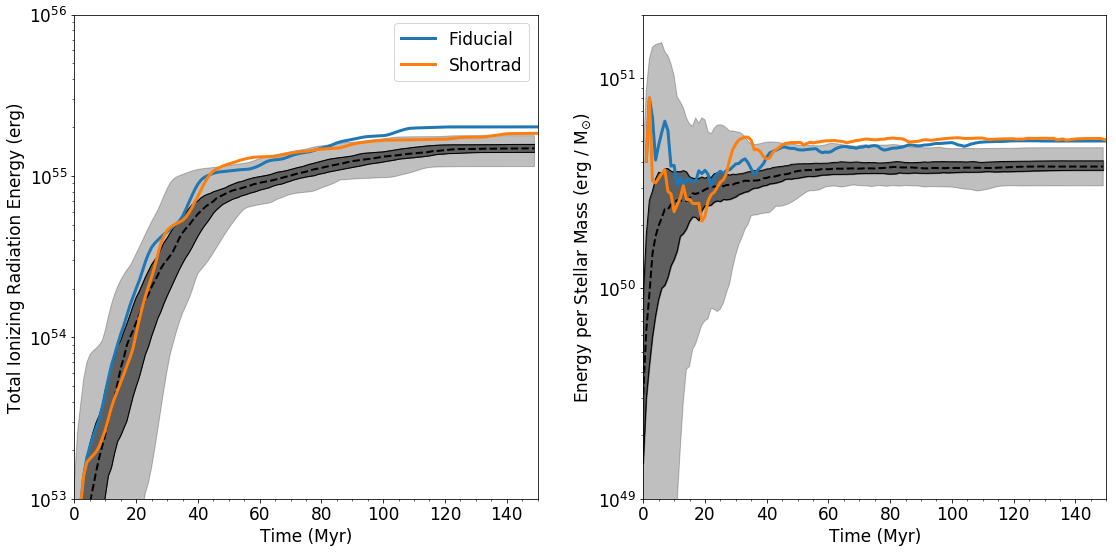

In [28]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NoRT' : 'C3'}

norm, norm2 = 1.0, 1.0
#norm, norm2 = L0_int['Fiducial'], L0_int['Fiducial'] / M['Fiducial'][1:]

plot_stats = True
if plot_stats:
    xs = 0.0
    ax[0].plot(L_stats['t']-xs, L_stats['median'], lw = 2, color = 'black', ls = '--')
    ax[0].plot(L_stats['t']-xs, L_stats['q1'],     lw = 1, color = 'black', ls = '-')
    ax[0].plot(L_stats['t']-xs, L_stats['q3'],     lw = 1, color = 'black', ls = '-')
    ax[0].fill_between(L_stats['t']-xs, L_stats['q1'], L_stats['q3'], color = 'black', alpha = 0.5, interpolate = True)
    ax[0].fill_between(L_stats['t']-xs, L_stats['min'], L_stats['max'], color = "black", alpha = 0.25, interpolate = True)
    
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['median'], lw = 2, color = 'black', ls = '--')
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['q1'],     lw = 1, color = 'black', ls = '-')
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['q3'],     lw = 1, color = 'black', ls = '-')
    ax[1].fill_between(L_M_stats['t']-xs, L_M_stats['q1'], L_M_stats['q3'], color = 'black', alpha = 0.5, interpolate = True)
    ax[1].fill_between(L_M_stats['t']-xs, L_M_stats['min'], L_M_stats['max'], color = "black", alpha = 0.25, interpolate = True)

#############
for k in ['Fiducial','Shortrad']:
    ax[0].plot( tcent[1:], L0_int[k]   / norm, lw = 3, ls = '-', color = colors[k], label = k)
    ax[1].plot( tcent[1:], L0_int[k] / M[k][1:] / norm2 , lw = 3, ls = '-', color = colors[k], label = k)
    

ax[1].set_ylabel(r'Energy per Stellar Mass (erg / M$_{\odot}$)')
ax[0].set_ylabel(r'Total Ionizing Radiation Energy (erg)')
ax[0].legend(loc='best')
ax[1].set_ylim(1.0E49,2.0E51)

ax[0].set_ylim(1.0E53, 1.0E56)

for a in ax:
    a.minorticks_on()
    a.set_xlabel(r'Time (Myr)')
    a.set_xlim(0.0, 150.0)
    a.semilogy()
#ax[0].set_ylim(0.05,100.0)
#ax[1].set_ylim(0.05,100.0)
plt.tight_layout()

if norm is 1.0:
    fig.savefig("/home/aemerick/code/galaxy_analysis/papers/radiation_paper/L_HI_integrated_comparison.png")
else:
    fig.savefig("/home/aemerick/code/galaxy_analysis/papers/radiation_paper/L_HI_integrated_comparison_normalized.png")

print L0_int['Fiducial'][-1] / L_stats['median'][-1]

2.111347898966959


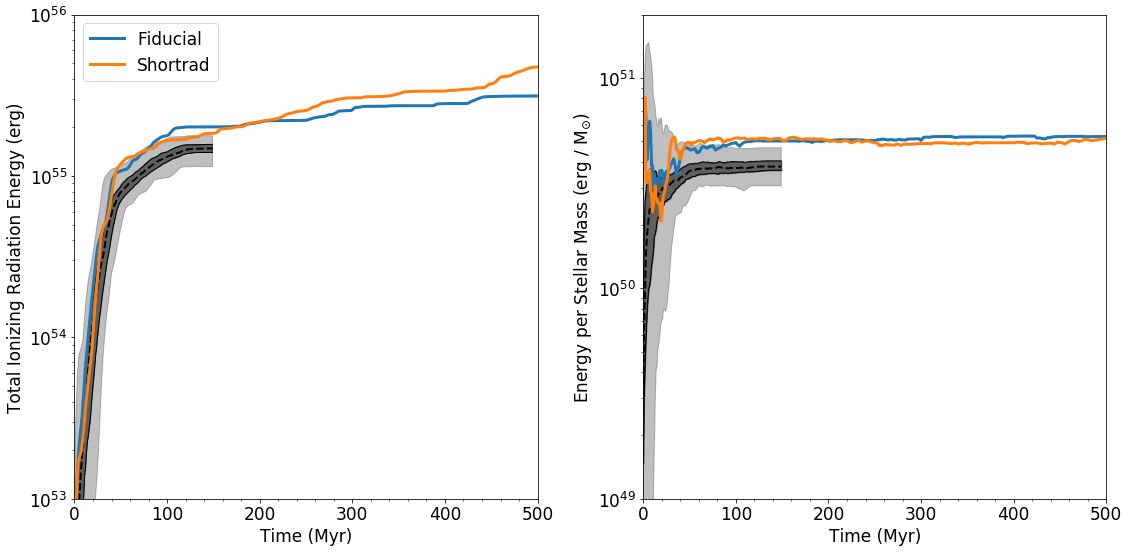

In [29]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NoRT' : 'C3'}

norm, norm2 = 1.0, 1.0
#norm, norm2 = L0_int['Fiducial'], L0_int['Fiducial'] / M['Fiducial'][1:]

plot_stats = True
if plot_stats:
    xs = 0.0
    ax[0].plot(L_stats['t']-xs, L_stats['median'], lw = 2, color = 'black', ls = '--')
    ax[0].plot(L_stats['t']-xs, L_stats['q1'],     lw = 1, color = 'black', ls = '-')
    ax[0].plot(L_stats['t']-xs, L_stats['q3'],     lw = 1, color = 'black', ls = '-')
    ax[0].fill_between(L_stats['t']-xs, L_stats['q1'], L_stats['q3'], color = 'black', alpha = 0.5, interpolate = True)
    ax[0].fill_between(L_stats['t']-xs, L_stats['min'], L_stats['max'], color = "black", alpha = 0.25, interpolate = True)
    
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['median'], lw = 2, color = 'black', ls = '--')
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['q1'],     lw = 1, color = 'black', ls = '-')
    ax[1].plot(L_M_stats['t']-xs, L_M_stats['q3'],     lw = 1, color = 'black', ls = '-')
    ax[1].fill_between(L_M_stats['t']-xs, L_M_stats['q1'], L_M_stats['q3'], color = 'black', alpha = 0.5, interpolate = True)
    ax[1].fill_between(L_M_stats['t']-xs, L_M_stats['min'], L_M_stats['max'], color = "black", alpha = 0.25, interpolate = True)

#############
for k in ['Fiducial','Shortrad']:
    ax[0].plot( tcent[1:], L0_int[k]   / norm, lw = 3, ls = '-', color = colors[k], label = k)
    ax[1].plot( tcent[1:], L0_int[k] / M[k][1:] / norm2 , lw = 3, ls = '-', color = colors[k], label = k)
    

ax[1].set_ylabel(r'Energy per Stellar Mass (erg / M$_{\odot}$)')
ax[0].set_ylabel(r'Total Ionizing Radiation Energy (erg)')
ax[0].legend(loc='best')
ax[1].set_ylim(1.0E49,2.0E51)

ax[0].set_ylim(1.0E53, 1.0E56)

for a in ax:
    a.minorticks_on()
    a.set_xlabel(r'Time (Myr)')
    a.set_xlim(0.0, 500.0)
    a.semilogy()
#ax[0].set_ylim(0.05,100.0)
#ax[1].set_ylim(0.05,100.0)
plt.tight_layout()

if norm is 1.0:
    fig.savefig("/home/aemerick/code/galaxy_analysis/papers/radiation_paper/L_HI_integrated_comparison_full.png")
else:
    fig.savefig("/home/aemerick/code/galaxy_analysis/papers/radiation_paper/L_HI_integrated_comparison_normalized_full.png")

print L0_int['Fiducial'][-1] / L_stats['median'][-1]

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NoRT' : 'C3'}

norm, norm2 = 1.0, 1.0
norm, norm2 = L0['Fiducial'], L0['Fiducial'] / M['Fiducial']


for k in colors:
    ax[0].plot( tcent, L0[k]       / norm, lw = 3, ls = '-', color = colors[k], label = k)
    ax[1].plot( tcent, L0[k] / M[k] / norm2 , lw = 3, ls = '-', color = colors[k], label = k)
    
ax[0].semilogy()
#ax.set_ylim(ax.get_ylim())
ax[1].semilogy()
ax[0].set_xlim(0.0, 100.0)
ax[1].set_xlim(0.0, 100.0)

ax[0].set_xlabel(r'Time (Myr)')
ax[1].set_xlabel(r'Time (Myr)')

ax[1].set_ylabel(r'HI Luminosity per stellar mass')
ax[0].set_ylabel(r'Total HI Ionizing Luminosity')
ax[0].legend(loc='best')
ax[0].minorticks_on()
ax[1].minorticks_on()

plt.tight_layout()

ax[0].set_ylim(0.05,100.0)
ax[1].set_ylim(0.05,100.0)

if norm is 1.0:
    fig.savefig("L_HI_comparison.png")
else:
    fig.savefig("L_HI_comparison_normalized.png")

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NoRT' : 'C3'}

norm, norm2 = 1.0, 1.0
norm, norm2 = L0['Fiducial'], L0['Fiducial'] / M['Fiducial']


for k in colors:
    ax[0].plot( tcent, L0[k]       / norm, lw = 3, ls = '-', color = colors[k], label = k)
    ax[1].plot( tcent, L0[k] / M[k] / norm2 , lw = 3, ls = '-', color = colors[k], label = k)
    
ax[0].semilogy()
#ax.set_ylim(ax.get_ylim())
ax[1].semilogy()
ax[0].set_xlim(0.0, 500.0)
ax[1].set_xlim(0.0, 500.0)

ax[0].set_xlabel(r'Time (Myr)')
ax[1].set_xlabel(r'Time (Myr)')

ax[1].set_ylabel(r'HI Luminosity per stellar mass')
ax[0].set_ylabel(r'Total HI Ionizing Luminosity')
ax[0].legend(loc='best')
ax[0].minorticks_on()
ax[1].minorticks_on()

plt.tight_layout()

ax[0].set_ylim(0.001,10000.0)
ax[1].set_ylim(0.001,10000.0)



if norm is 1.0:
    fig.savefig("L_HI_comparison_full.png")
else:
    fig.savefig("L_HI_comparison_normalized_full.png")
    

In [ ]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,8)

colors = {'Fiducial' : 'C0', 'Shortrad' : 'C1', 'NoRT' : 'C3'}

norm, norm2 = 1.0, 1.0
#norm, norm2 = L0_int['Fiducial'], L0_int['Fiducial'] / M['Fiducial'][1:]


for k in colors:
    ax[0].plot( tcent[1:], L0_int[k] * 3.1556E13       / norm, lw = 3, ls = '-', color = colors[k], label = k)
    ax[1].plot( tcent[1:], L0_int[k] / M[k][1:] / norm2 , lw = 3, ls = '-', color = colors[k], label = k)
    
ax[0].semilogy()
#ax.set_ylim(ax.get_ylim())
ax[1].semilogy()
ax[0].set_xlim(0.0, 500.0)
ax[1].set_xlim(0.0, 500.0)

ax[0].set_xlabel(r'Time (Myr)')
ax[1].set_xlabel(r'Time (Myr)')

ax[1].set_ylabel(r'HI Luminosity per stellar mass')
ax[0].set_ylabel(r'Total HI Ionizing Luminosity')
ax[0].legend(loc='best')
ax[0].minorticks_on()
ax[1].minorticks_on()

plt.tight_layout()

#ax[0].set_ylim(0.05,100.0)
#ax[1].set_ylim(0.05,100.0)

if np.size(norm)==1:
    fig.savefig("L_HI_integrated_comparison_full.png")
else:
    fig.savefig("L_HI_integrated_comparison_normalized_full.png")